<a href="https://colab.research.google.com/github/yneha70/IIIT-AIML_Project_and_labs/blob/main/Project_Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv


In [4]:
diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')

In [5]:
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,69,25,147,18.4,2.39,24,1
1,3,105,58,30,247,37.2,0.47,27,1
2,12,82,56,20,26,36.1,1.60,58,1
3,14,140,102,46,60,40.9,1.24,49,1
4,10,155,58,45,48,37.2,0.93,51,0
5,7,97,97,44,92,44.5,0.94,45,1
6,12,135,94,28,232,48.7,1.09,77,0
7,4,114,101,29,87,29.0,1.79,32,0
8,6,131,62,27,296,25.3,1.54,47,0
9,9,97,48,56,263,31.6,1.20,54,0


In [6]:
diabetes_data.shape

(200, 9)

In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,200.0,7.45000,4.320978,0.0,4.000,7.500,11.000,14.0
Glucose,200.0,139.66000,38.985558,71.0,106.750,136.000,175.500,199.0
BloodPressure,200.0,77.72000,22.528856,40.0,58.000,76.500,97.000,119.0
SkinThickness,200.0,32.85000,14.289452,10.0,20.750,32.000,43.250,59.0
Insulin,200.0,142.80000,82.937344,15.0,70.000,138.000,218.000,296.0
BMI,200.0,34.59700,8.930631,18.4,26.850,34.900,42.725,49.6
DiabetesPedigreeFunction,200.0,1.29485,0.739160,0.1,0.665,1.345,1.920,2.5
Age,200.0,46.74500,17.389709,18.0,32.000,45.000,63.000,79.0
Outcome,200.0,0.54000,0.499648,0.0,0.000,1.000,1.000,1.0


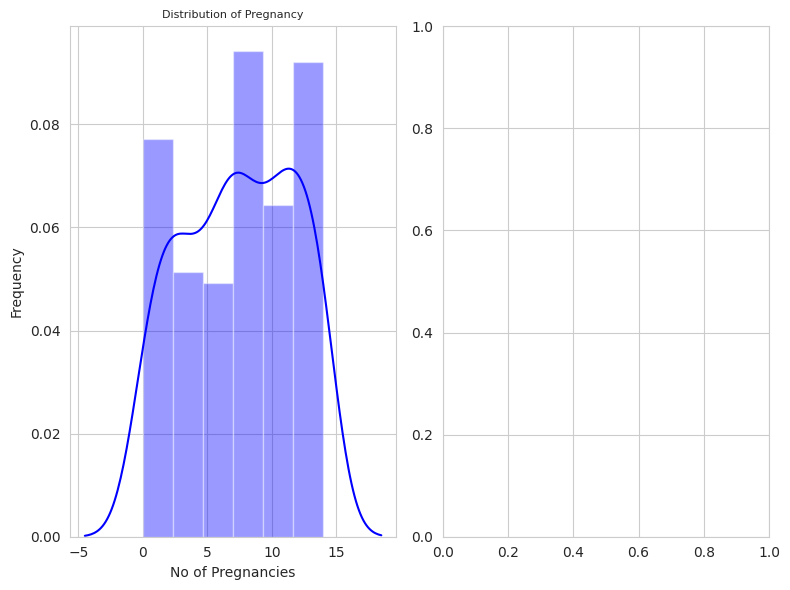

In [8]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()

In [9]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,-0.002160,-0.043300,0.148163,0.038014,0.123316,0.038537,-0.130212,0.028862
Glucose,-0.002160,1.000000,-0.013045,-0.087311,0.009806,-0.017041,0.023784,0.049222,-0.084688
BloodPressure,-0.043300,-0.013045,1.000000,0.006253,-0.043561,0.034326,0.116174,0.010720,0.109926
SkinThickness,0.148163,-0.087311,0.006253,1.000000,0.190094,0.066923,-0.150996,0.012909,0.073339
Insulin,0.038014,0.009806,-0.043561,0.190094,1.000000,-0.033977,-0.026224,0.015842,-0.048918
BMI,0.123316,-0.017041,0.034326,0.066923,-0.033977,1.000000,-0.026813,-0.049893,-0.055267
DiabetesPedigreeFunction,0.038537,0.023784,0.116174,-0.150996,-0.026224,-0.026813,1.000000,-0.004927,0.082539
Age,-0.130212,0.049222,0.010720,0.012909,0.015842,-0.049893,-0.004927,1.000000,-0.108996
Outcome,0.028862,-0.084688,0.109926,0.073339,-0.048918,-0.055267,0.082539,-0.108996,1.000000


Outcome
1    108
0     92
Name: count, dtype: int64


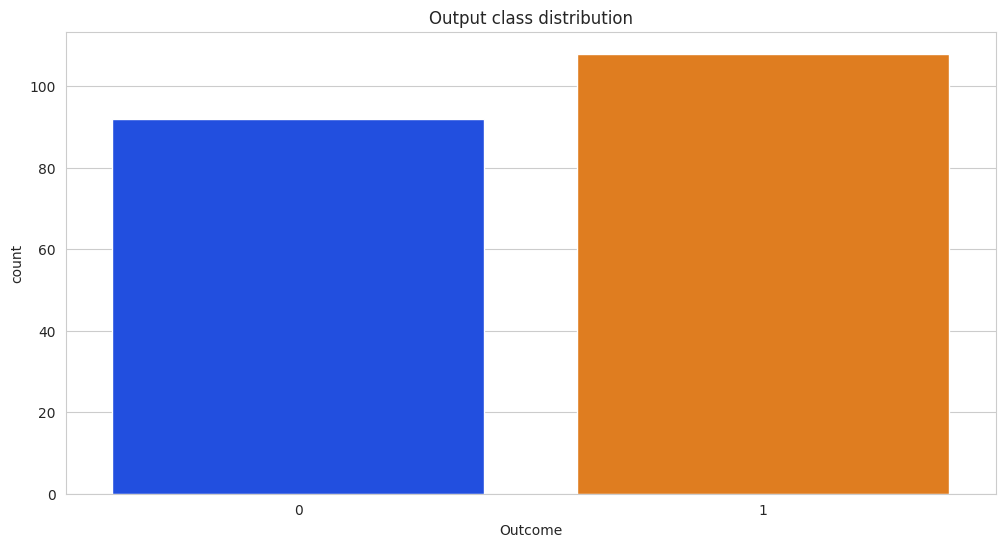

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Output class distribution")

print(diabetes_data['Outcome'].value_counts())

<Axes: xlabel='Outcome', ylabel='BMI'>

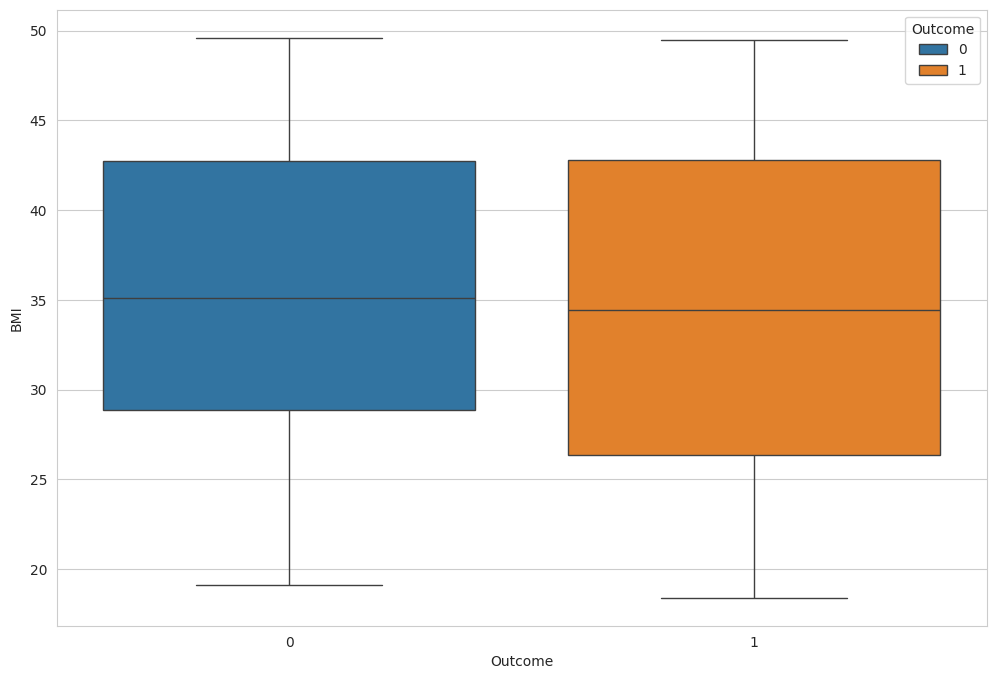

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

In [12]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

,count
Outcome,
1,23
0,15


In [13]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

,count
Outcome,
1,85
0,77


<Axes: xlabel='Outcome', ylabel='BMI'>

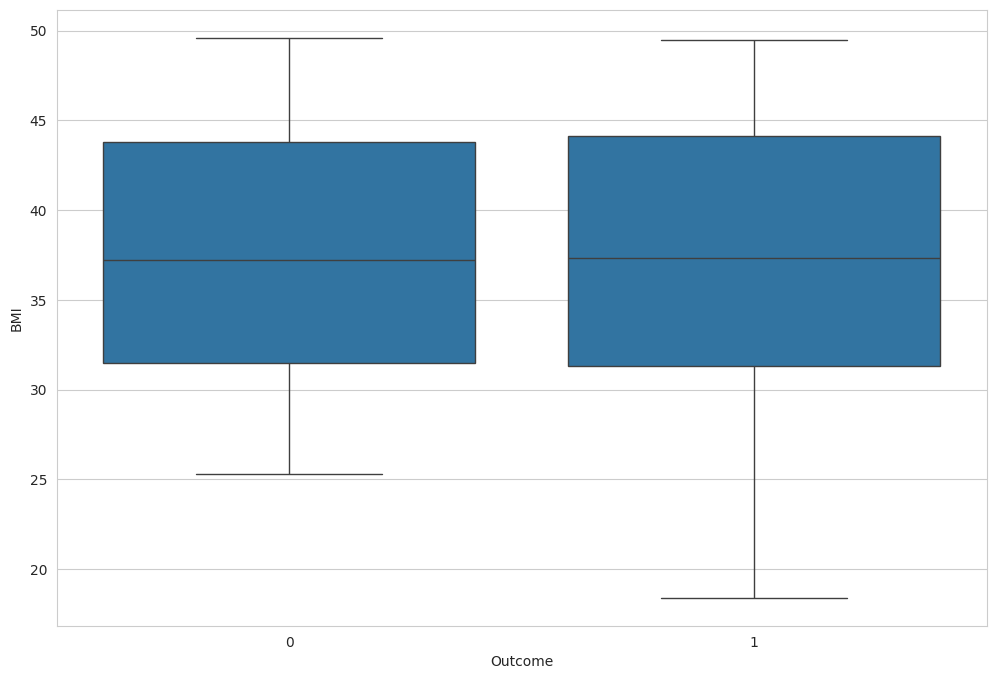

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

In [15]:
unchanged_data = diabetes_data.drop('Outcome',axis=1)

In [16]:
unchanged_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,69,25,147,18.4,2.39,24
1,3,105,58,30,247,37.2,0.47,27
2,12,82,56,20,26,36.1,1.60,58
3,14,140,102,46,60,40.9,1.24,49
4,10,155,58,45,48,37.2,0.93,51
...,...,...,...,...,...,...,...,...
195,0,121,71,51,275,26.6,1.00,39
196,3,82,84,31,171,35.3,0.12,45
197,12,183,100,30,61,23.2,2.06,37
198,3,193,86,15,187,44.9,0.41,50


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [21]:
def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=101)

  for i in range(1,40):
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)

      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores


Max train score 100.0 % and k = [1]

Max test score 56.666666666666664 % and k = [3]


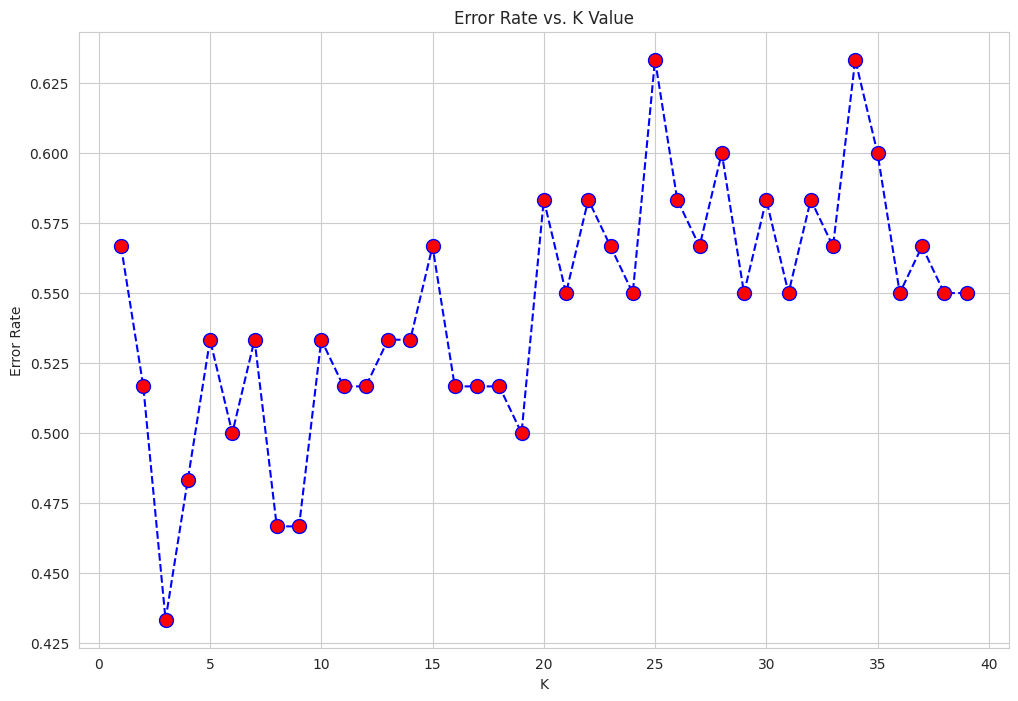

In [22]:
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,diabetes_data['Outcome'])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler()

In [25]:
scaled_data = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [26]:
df_feat = pd.DataFrame(scaled_data,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.336414,-1.071282,-0.388030,-0.550735,0.050768,-1.818197,1.485332,-1.311240
1,-1.032444,-0.891278,-0.877518,-0.199948,1.259523,0.292200,-1.118729,-1.138291
2,1.055645,-1.482721,-0.966516,-0.901521,-1.411826,0.168720,0.413869,0.648846
3,1.519664,0.008743,1.080433,0.922569,-1.000849,0.707544,-0.074392,0.130000
4,0.591625,0.394466,-0.877518,0.852411,-1.145900,0.292200,-0.494839,0.245299



Max train score 100.0 % and k = [1]

Max test score 53.333333333333336 % and k = [9, 38]


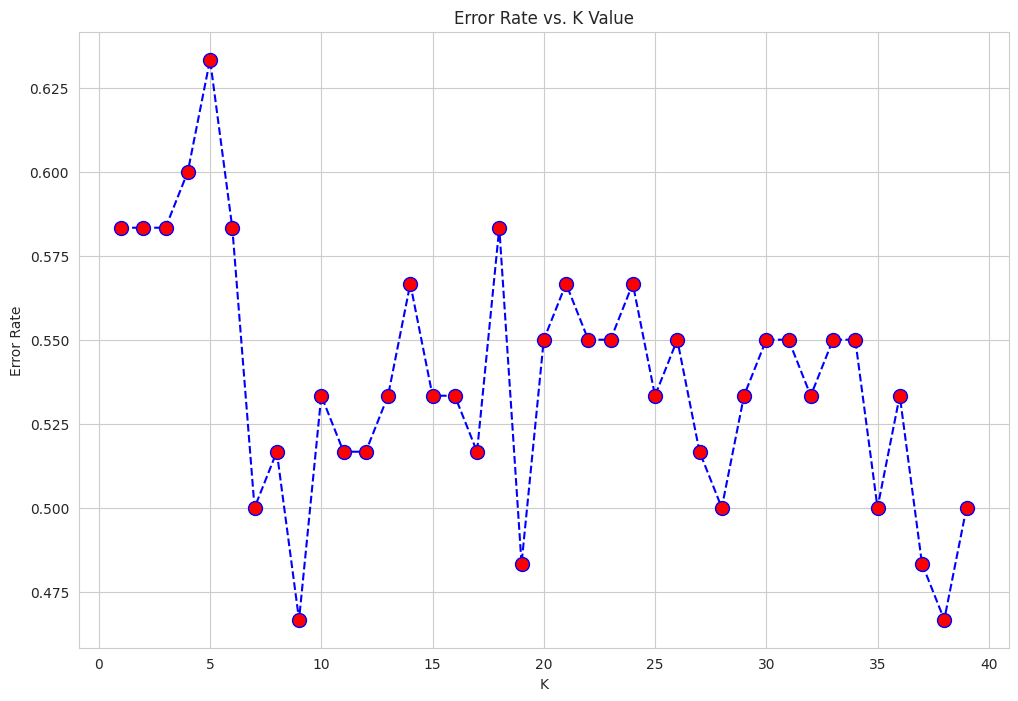

In [27]:
scaled_test_scores = plot_KNN_error_rate(scaled_data,diabetes_data['Outcome'])

<Axes: title={'center': 'Accuracy vs. K Value'}>

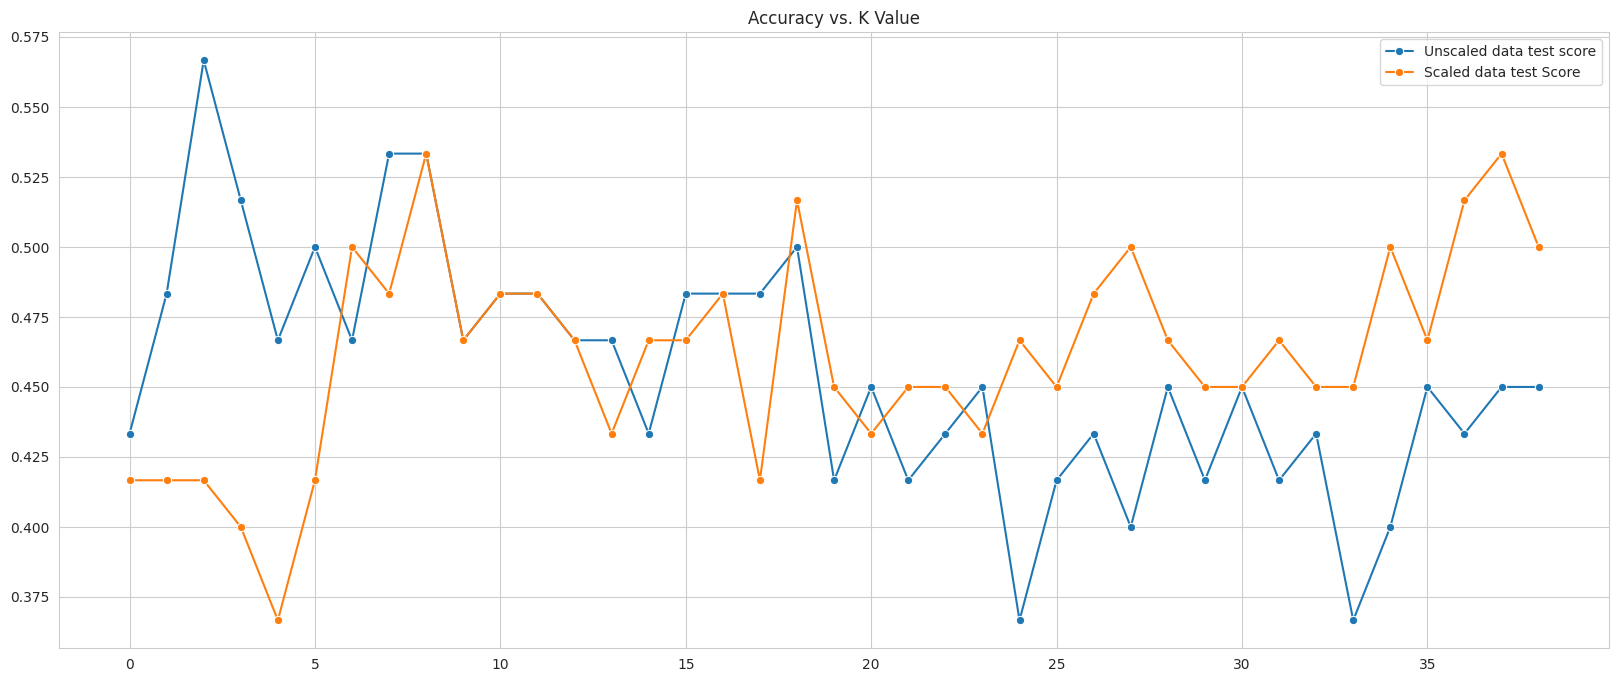

In [28]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')